# GMOS Playground

In [1]:
path_to_beads = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/'

In [17]:
#system
from __future__ import division
import sys

#numpy
import numpy as np

import h5py

#matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm
from matplotlib.colors import ListedColormap
from palettable.colorbrewer.qualitative import Set1_4 as brewermap
%matplotlib inline

#astropy
from astropy.wcs import WCS
import astropy.units as u
from astropy.cosmology import LambdaCDM
from astropy.io import fits
from astropy import constants as const

#seaborn
import seaborn as sns 

import importlib


In [3]:
#import my own functions: you can see them in full in the utils folder
util_path = path_to_beads + 'Notebooks/Beads20/utils/'
sys.path.append(util_path)

import plotting_functions as pf
import science_functions as sf

In [15]:
#uncomment if need to reload module
importlib.reload(sf)

<module 'science_functions' from '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Notebooks/Beads20/utils/science_functions.py'>

In [4]:
#paths
fig_path = path_to_beads + 'Figures/paper/'
gmos_data_directory = path_to_beads + 'Analysis/gmosBeads/'

In [5]:
#About the galaxy cluster
sf.sdss1531_dict

{'name': 'SDSS J1531+3414',
 'ra': 232.7936938,
 'dec': 34.2404172,
 'radius': 2.5,
 'z': 0.335,
 'cz': 100430.47}

In [6]:
#plot style
pf.styleplots()

In [7]:
cosmo = LambdaCDM(H0=71, Om0=0.27, Ode0=0.73)

### Load Data

In [8]:
# Loading ppxf output for 1-Gaussian fit
save_path = ''.join((path_to_beads,'Analysis/gmosBeads/ppxf/fit_results/result_table/'))
filename = save_path + '2_ppxffit.hdf5'
f = h5py.File(filename, 'r')

In [9]:
#Load Field of View Cube
fov = gmos_data_directory + 'reduced/SDSSJ1531+3414.acube.fits'
hdu, hdr, w = pf.open_fits(fov, naxis=2)

In [10]:
#plot HST on top
hst_hdr, hst_wcs, hst_hdu = sf.load_HST_data(path_to_beads)
ysc_coords = sf.ysc_load(path_to_beads)
hst_cont_color, ysc_color = 'k', 'cyan'

### What can we do with PyParadise data

In [ ]:
def plot_maps(prefix, redshift):
    
    plt.close()
    
    cz = const.c.to(u.km/u.s) * redshift

    eline_hdu = fits.open(f'{prefix}.eline_table.fits')

    eline_tab = eline_hdu[1].data
    eline_columns = eline_hdu[1].header

    eline_x_cor = eline_tab.field('x_cor')
    eline_y_cor = eline_tab.field('y_cor')


    Ha_flux = eline_tab.field('Halpha_flux')
    #Ha_flux_err = eline_tab.field('Halpha_flux_err')
    Ha_vel = eline_tab.field('Halpha_vel')
    Ha_fwhm = eline_tab.field('Halpha_fwhm')

    dim = (31,20)

    Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
    Ha_vel_map = np.full((dim[0],dim[1]) ,np.nan)
    Ha_fwhm_map = np.full((dim[0],dim[1]) ,np.nan)
    # gas_select = (Ha_flux / Ha_flux_err) > 3.0

    Ha_flux_map[eline_y_cor,eline_x_cor] = Ha_flux
    Ha_vel_map[eline_y_cor,eline_x_cor] = Ha_vel
    Ha_fwhm_map[eline_y_cor,eline_x_cor] = Ha_fwhm

    sns.set_style("darkgrid", {'axes.grid' : False})
    
    
#     fig = plt.figure(figsize=(12,8))

    fig, axs = plt.subplots(1,3, figsize=(12,8))



    cmaps = ['magma',sns.color_palette("Spectral", as_cmap=True), 
                sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)]
#     cmap.set_bad('white',1) # Make the NANs white
    ims = [Ha_flux_map, Ha_vel_map-cz.value, Ha_fwhm_map]
    vmins, vmaxs = [0.000001, -500, 0], [0.015, 500, 500]

    for idx, ax in enumerate(axs):
        im = ax.imshow(ims[idx], origin='lower', vmin=vmins[idx], vmax=vmaxs[idx],  
                    cmap=cmaps[idx], interpolation='None')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        plt.colorbar(im, cax=cax)       
   



#     axs[0].imshow(Ha_flux_map, origin='lower', vmin=0.000001, vmax=0.01,  cmap=cmap, interpolation='None')
#     axs[1].imshow(Ha_vel_map-cz.value, vmin=-500, vmax=500,origin='lower', cmap=sns.color_palette("Spectral", as_cmap=True))
#     axs[2].imshow(Ha_fwhm_map,origin='lower', vmin=0, vmax=500, cmap=sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True))
    
    

#     #     cbar = plt.colorbar()
# #     cbar.set_label(r"H$\alpha$ Flux ($\times 10^{-16}$ erg s$^{-1}$ cm$^{-2}$)")


    plt.show()
    

In [11]:
bernd_run = '/Users/osaseomoruyi/Dropbox (Harvard University)/BeadsMultiwavelength/Analysis/gmosBeads/reduced/SDSSJ1531+3414'

In [13]:
eline_hdu = fits.open(f'{bernd_run}.eline_table.fits')

eline_tab = eline_hdu[1].data
eline_columns = eline_hdu[1].header

eline_x_cor = eline_tab.field('x_cor')
eline_y_cor = eline_tab.field('y_cor')


Ha_flux = eline_tab.field('Halpha_flux')
#Ha_flux_err = eline_tab.field('Halpha_flux_err')
Ha_vel = eline_tab.field('Halpha_vel')
Ha_fwhm = eline_tab.field('Halpha_fwhm')

dim = (31,20)

Ha_flux_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_vel_map = np.full((dim[0],dim[1]) ,np.nan)
Ha_fwhm_map = np.full((dim[0],dim[1]) ,np.nan)

Ha_flux_map[eline_y_cor,eline_x_cor] = Ha_flux
Ha_vel_map[eline_y_cor,eline_x_cor] = Ha_vel
Ha_fwhm_map[eline_y_cor,eline_x_cor] = Ha_fwhm



In [37]:
OIII5007_flux = eline_tab.field('OIII5007_flux')
OIII5007_flux_map = np.full((dim[0],dim[1]) ,np.nan)

OIII5007_flux_map[eline_y_cor,eline_x_cor] = OIII5007_flux


(31.0, 0.0)

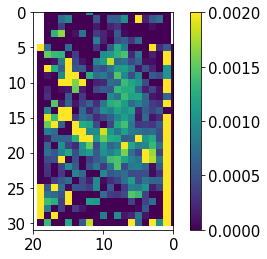

In [45]:
plt.imshow(OIII5007_flux_map, vmin=0, vmax=0.002)
plt.colorbar()
plt.xlim(20,0)
plt.ylim(31, 0)

(31.0, 0.0)

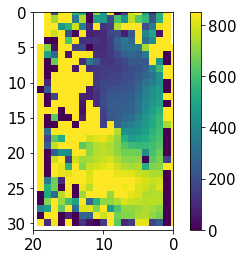

In [24]:
plt.imshow(Ha_vel_map - (const.c.to(u.km/u.s).value * 0.335), vmin=0, vmax=850)
plt.colorbar()
plt.xlim(20,0)
plt.ylim(31, 0)

(31.0, 0.0)

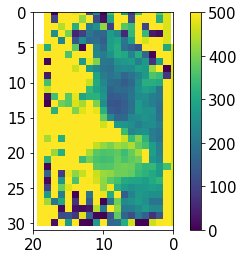

In [28]:
plt.imshow(Ha_fwhm_map, vmin=0, vmax=500)
plt.colorbar()
plt.xlim(20,0)
plt.ylim(31, 0)

### Cakculate SFR with GMOS and KS Law

In [65]:
Ha, Ha_mask = sf.ppx_masked_flux_maps(f, 'Ha', snr=3)

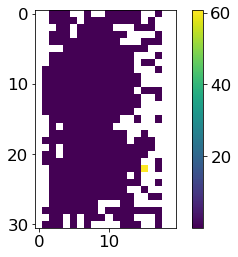

In [66]:
plt.imshow(Ha)
plt.colorbar(vmin=50)

In [74]:
new_ha = Ha[np.where(Ha < 5)]

In [93]:
Ha_flux = (6.335 )* 1e-16 * u.erg/ (u.s * u.cm**2)
sfr = sf.sfr_ks(Ha_flux, z=0.335, cosmology=cosmo).cgs

In [94]:
Ha_lum = sf.lum(Ha_flux, z=0.335, cosmology=cosmo)

In [95]:
np.nansum(Ha_lum.cgs) 

<Quantity 2.32778062e+41 erg / s>

In [28]:
cosmo.luminosity_distance(0.335)

<Quantity 1752.43628481 Mpc>

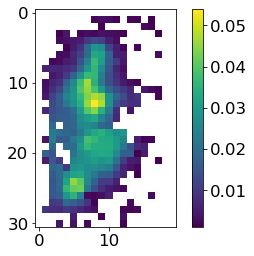

In [26]:
plt.imshow(sfr)
plt.colorbar()

In [29]:
np.nansum(Ha_flux)

<Quantity 1.83336734e-15 erg / (cm2 s)>

### Try fit Stellar con with ppxf

### Balmer Decrement

What could cause Robs to be less than the theoretical value for Ha/Hb. Is this remotely physical?? If so, extinction is not an issue here. The gas is not dusty

In [15]:
Ha, Ha_mask = sf.ppx_masked_flux_maps(f, 'Ha')
Hb, Hb_mask = sf.ppx_masked_flux_maps(f, 'Hb')

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


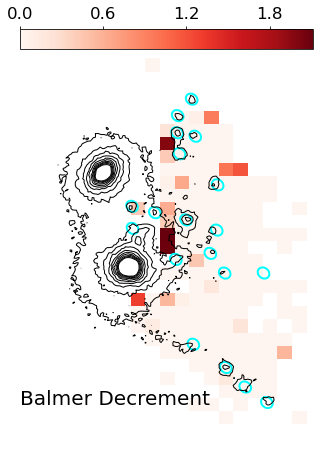

In [27]:
fig = plt.figure(figsize=(5, 7))
gs1 = GridSpec(1, 1)

clims=[[0, None]]
cmap=cm.Reds
maps = [sf.av(Ha, Hb)]
map_names = ['Balmer Decrement']

for idm, map in enumerate(maps):

    clim = clims[idm]

    ax = fig.add_subplot(gs1[idm], projection=w)
    ax = pf.ax_fits_map(hdu=None, data=map, hdr=hdr,
                            vmin=clim[0], vmax=clim[1], cmap=cmap, 
                            coords=None, ax=ax, contour=False, 
                            clip=None, lw=5, cbar=True, wcs=w)

    ##HST Contours: uncomment below lines if not in rush
    pf.overlay(ax, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
                cont_color=hst_cont_color, lw=1)

    #YSC Overlay
    pf.overlay(ax, None, 1, None, None, clusters=True, cont_color=ysc_color, 
                ysc_coords=ysc_coords)

    ax.set_xlim(20,0)
    ax.set_ylim(31, 0)

    ax.axis('off')
    ax.text(20, 27, map_names[idm], fontsize=20)

fig.tight_layout()


### [NII] BPT Diagram

The `OIII lines` are incredibly faint and hardly distinguishable from background. Plotting below just to see what it looks like

In [12]:
def Classify_nii_BPT(table):
    """ Classify NII BPT spaxels"""
    snr = 10

    SNR_Ha, Ha_mask = sf.ppx_masked_flux_maps(table, 'Ha', snr=snr)
    SNR_Hb, Hb_mask = sf.ppx_masked_flux_maps(table, 'Hb', snr=snr)
    SNR_OIII, O3_mask = sf.ppx_masked_flux_maps(table, 'OIII5007', snr=snr)
    SNR_NII, N2_mask = sf.ppx_masked_flux_maps(table, 'NII6583', snr=snr)


    ## BPT DIAGRAM: NII ##
    #Kewley et al. 2001: starburst vs AGN classification. Solid lines in BPT
    #log10(flux_oiii_5006/flux_hbeta)=0.61/(log10(flux_nii_6583/flux_halpha)-0.47)+1.19
    #Kauffmann et al. 2003: starburst vs composites. Dashed line in BPT
    #log10(flux_oiii_5006/flux_hbeta)=0.61/(log10(flux_nii_6583/flux_halpha)-0.05)+1.3
    #Schawinsky et al. 2007: Seyferts vs LINERS
    #log10(flux_oiii_5006/flux_hbeta)=1.05*log10(flux_nii_6583/flux_halpha)+0.45

    i_bptnii = np.log10(SNR_NII/SNR_Ha)
    j_bptnii = np.log10(SNR_OIII/SNR_Hb)
    Kew01_nii = 0.61/(i_bptnii-0.47)+1.19
    Scha07 = 1.05*i_bptnii+0.45
    Ka03 = 0.61/(i_bptnii-0.05)+1.3
    
    agn_nii = ((j_bptnii>=Kew01_nii) & (j_bptnii>Scha07))
    liner_nii = ((j_bptnii>=Kew01_nii) & (j_bptnii<Scha07) | (i_bptnii>=0.47))
    composite_nii = ((j_bptnii>=Ka03) & (j_bptnii<Kew01_nii))
    sf_nii = ((j_bptnii<Ka03) & (i_bptnii<=-0.25))

    excitation = np.zeros_like(SNR_Ha)
    excitation[sf_nii] = 1
    excitation[composite_nii] = 2
    excitation[liner_nii] = 3
    excitation[agn_nii] = 4
    excitation[excitation==0.0] = np.nan

    
    return (i_bptnii, j_bptnii, excitation)

In [13]:
nii_bpt = Classify_nii_BPT(f)

dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.
dataset.value has been deprecated. Use dataset[()] instead.


The following kwargs were not used by contour: 'rasterized'


(31.0, 0.0)

findfont: Font family ['Computer Modern Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Computer Modern Roman'] not found. Falling back to DejaVu Sans.


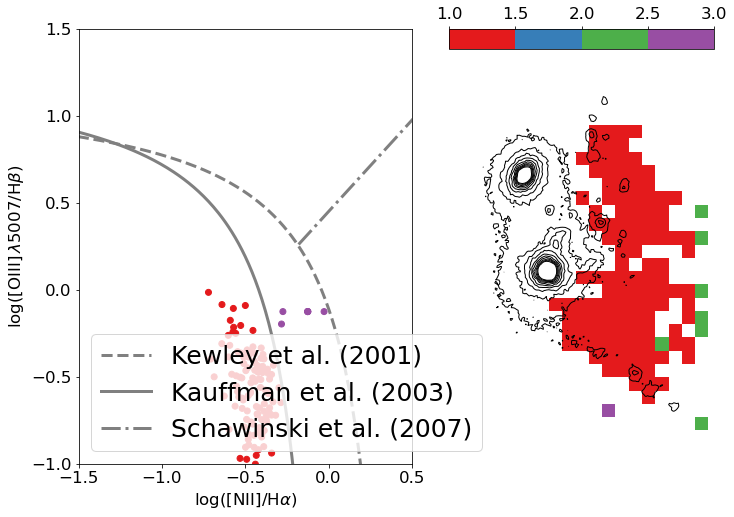

In [14]:
fig = plt.figure(figsize=(12, 8))
            
gs1 = GridSpec(1, 2)
gs1.update(wspace=0.01)

ax =  fig.add_subplot(gs1[0, 0])

cmap = ListedColormap(brewermap.mpl_colors)
excitation = nii_bpt[2]

ax.scatter(nii_bpt[0], nii_bpt[1], c=excitation, cmap=cmap)

t = np.arange(-2.0,0.3,0.01)
l = np.arange(-2.0,0.0,0.01)
s = np.arange(-0.18, 1.5, 0.01)

Kew01_nii = 0.61/(t-0.47)+1.19
Scha07 = 1.05*s+0.45
Ka03 = 0.61/(l-0.05)+1.3

ax.plot(t,Kew01_nii,'--',color='gray',linewidth=3,label='Kewley et al. (2001)')
ax.plot(l,Ka03,'-',color='gray',linewidth=3,label='Kauffman et al. (2003)')
ax.plot(s,Scha07,'-.',color='gray',linewidth=3,label='Schawinski et al. (2007)')


ax.set_xlim(-1.5, 0.5)
ax.set_ylim(-1, 1.5)
ax.legend()
ax.set_ylabel(r'$\log(\mathrm{[O III]}\,\lambda 5007 / \mathrm{H}\beta)$')
ax.set_xlabel(r'$\log(\mathrm{[N II]}/ \mathrm{H}\alpha)$')


ax2 = fig.add_subplot(gs1[0, 1], projection=WCS(hdr), slices=('x', 'y', 0))
pf.ax_plot(ax2, excitation, hdr, cmap=cmap, vmin=None, vmax = None)
ax2.axis('off')
pf.overlay(ax2, hst_hdu, 1, vmin=0.05, vmax=0.5, nlev=10, contours=True, 
                cont_color='k', lw=1)
ax2.set_xlim(20,0)
ax2.set_ylim(31, 0)